In [1]:
#!python -m pip install -U gensim
#!pip install gensim
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 10.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 40.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=d885f9f814d2b16ff33c60addc3924d227e0391c1957d2642d6ab3205f0216ce
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=668c96201b7ee0a3a93283302d7cb2f5db8ced78832673e5db1be97c56630d24
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [3]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.9 MB/s 


In [4]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 67 kB/s 


In [5]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 8.2 MB 8.8 MB/s 


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#!pip install fasttext

In [8]:
!pip install fake_useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=76893d13269771c96d58c0fae617242bc2039876540b7c0874a70dd46a0e0110
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [9]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict

import re
import string # библиотека для работы со строками
import nltk   # Natural Language Toolkit

# загружаем библиотеку для лемматизации
import pymorphy2 # Морфологический анализатор

#from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import silhouette_samples
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
#from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics.pairwise import cosine_similarity

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

#import xgboost as xgb
#import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
#from MulticoreTSNE import MulticoreTSNE as TSNE

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist

from gensim.models import FastText
#import fasttext

from tslearn.clustering import TimeSeriesKMeans

from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import string

import requests

import threading
from threading import Thread
from time import sleep

In [10]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [11]:
def silhouette_plot(data, labels):
  cluster_labels = np.unique(labels)
  n_clusters = cluster_labels.shape[0]

  silhouette_vals = silhouette_samples(data, labels, metric="euclidean")

  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none", color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

  c_silhouette_avg = np.mean(c_silhouette_vals)
  plt.axvline(c_silhouette_avg, color="red", linestyle="--")
  plt.yticks(yticks, cluster_labels + 1)
  plt.ylabel("Кластер")
  plt.xlabel("Коэф. силуэта")
  plt.show()

In [12]:
def split_text(text):
    text = text.replace('«', '')
    text = text.replace('»', '')
    text = text.replace('"', '')
    text = text.replace('-', '')
    
    text = text.replace('т. д.', 'т д')
    text = text.replace('т. п.', 'т п')
    text = text.replace('др.', 'др')
    
    text = text.replace('...,', ',')
    text = text.replace('?,', ',')
    text = text.replace('!,', ',')
    text = text.replace('.,', ',')
    text = text.replace('.)', ')')
    text = text.replace(';,', ',')
    
    text = text.replace('....', ';')
    text = text.replace('...', ';')
    text = text.replace('..', ';')
    
    text = text.replace('!', ';')
    text = text.replace('!!', ';')
    text = text.replace('!!!', ';')
    text = text.replace('?', ';')
    text = text.replace('??', ';')
    text = text.replace('???', ';')
    text = text.replace('!?', ';')
    text = text.replace('?!', ';')
    text = text.replace('.', ';')
        
    return [txt.strip() for txt in text.split(';')]

**Загрузка описания психологических векторов.**

In [13]:
person_vectors = ("brown", "black", "red", "orange", "yellow", "green", "blue", "purple")

In [14]:
df_vectors = pd.DataFrame([], columns=["description", "vectorId"])

# Загружаем описание личности человека для каждого вектора из книги В.К. Толкачева
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors/" + person_vector + ".txt", encoding="utf8") as rf:
        for sentence in split_text(rf.read().strip()):
            if len(sentence) <= 2: continue
            df_vectors = df_vectors.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)
            
# Загружаем описание личности человека для каждого вектора из книги М.В. Бородянского
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors_/" + person_vector + ".txt", encoding="utf8") as rf:
        #sentences = re.sub(r'\s+', ' ', rf.read(), flags=re.M)
        #for sentence in re.split(r'(?<=[.!?…]) ', sentences):
        for sentence in split_text(rf.read().strip()):
            if len(sentence) <= 2: continue
            df_vectors = df_vectors.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)

In [15]:
df_vectors_neg = pd.DataFrame([], columns=["description", "vectorId"])

# Загружаем описание личности человека для каждого вектора из книги В.К. Толкачева
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors/" + person_vector + "_neg.txt", encoding="utf8") as rf:        
        for sentence in split_text(rf.read().strip()):
            if len(sentence) <= 2: continue
            df_vectors_neg = df_vectors_neg.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)
            
# Загружаем описание личности человека для каждого вектора из книги М.В. Бородянского
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors_/" + person_vector + "_neg.txt", encoding="utf8") as rf:       
        for sentence in split_text(rf.read().strip()):
            if len(sentence) <= 2: continue
            df_vectors_neg = df_vectors_neg.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True) 

In [16]:
df_vectors_pos = pd.DataFrame([], columns=["description", "vectorId"])

# Загружаем описание личности человека для каждого вектора из книги В.К. Толкачева
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors/" + person_vector + ".txt", encoding="utf8") as rf:
        with open("drive/MyDrive/vectors/" + person_vector + "_neg.txt", encoding="utf8") as rf_:
            sentences_neg = split_text(rf_.read().strip())
            for sentence in split_text(rf.read().strip()):
                if sentence in sentences_neg:
                  #print(sentence)
                  continue
                if len(sentence) <= 2: continue
                df_vectors_pos = df_vectors_pos.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)
            
# Загружаем описание личности человека для каждого вектора из книги М.В. Бородянского
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors_/" + person_vector + ".txt", encoding="utf8") as rf:
        with open("drive/MyDrive/vectors_/" + person_vector + "_neg.txt", encoding="utf8") as rf_:
            sentences_neg = split_text(rf_.read().strip())
            for sentence in split_text(rf.read().strip()):
                if sentence in sentences_neg:
                  #print(sentence)
                  continue
                if len(sentence) <= 2: continue
                df_vectors_pos = df_vectors_pos.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)

In [17]:
df_vectors.head()

,description,vectorId
0,"Люди, которых я хотел бы описать, выделяются т...",0
1,"От себя добавим, что есть в этом характере и ч...",0
2,Аккуратность обозначает здесь не только физиче...,0
3,Эти люди обладают морально нравственной чистоп...,0
4,Такой ребенок может ответить по телефону: Мама...,0


In [18]:
df_vectors.shape

(4562, 2)

In [19]:
df_vectors_pos.head()

,description,vectorId
0,"Люди, которых я хотел бы описать, выделяются т...",0
1,Аккуратность обозначает здесь не только физиче...,0
2,Эти люди обладают морально нравственной чистоп...,0
3,Такой ребенок может ответить по телефону: Мама...,0
4,Он — классический флегматик (носитель флегмати...,0


In [20]:
df_vectors_neg.head()

,description,vectorId
0,"От себя добавим, что есть в этом характере и ч...",0
1,По нашему мнению его гнев и мстительность — эт...,0
2,Иногда он может впасть в многолетнюю сутяжную ...,0
3,Иногда это упрямство перерастает в паранойю (п...,0
4,"При бесконечных запретах и наказаниях, угрозах...",0


In [21]:
# загружаем список стоп-слов для русского
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
word_tokenizer = nltk.WordPunctTokenizer()

In [23]:
# инициализируем лемматизатор
morph = pymorphy2.MorphAnalyzer()

**Предобработка описания векторов.**

In [24]:
def words_only(text):
    regex = re.compile("[А-Яа-яA]+")
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [25]:
# Токенизация
df_vectors["description"] = df_vectors["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

# Удаление стоп-слов
df_vectors["description"] = df_vectors["description"].apply(
    lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

# Лемматизация
df_vectors["description"] = df_vectors["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

In [26]:
# Токенизация
df_vectors_pos["description"] = df_vectors_pos["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

# Удаление стоп-слов
df_vectors_pos["description"] = df_vectors_pos["description"].apply(
    lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

# Лемматизация
df_vectors_pos["description"] = df_vectors_pos["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

In [27]:
# Токенизация
df_vectors_neg["description"] = df_vectors_neg["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

# Удаление стоп-слов
df_vectors_neg["description"] = df_vectors_neg["description"].apply(
    lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

# Лемматизация
df_vectors_neg["description"] = df_vectors_neg["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

In [28]:
df_vectors.head()

,description,vectorId
0,"[человек, который, хотеть, описать, выделяться...",0
1,"[от, добавить, характер, четвёртый, обязательн...",0
2,"[аккуратность, обозначать, физический, чистопл...",0
3,"[этот, человек, обладать, морально, нравственн...",0
4,"[такой, ребёнок, ответить, телефон, мама, сказ...",0


**Построение векторных моделей (TF-IDF, WordToVec).**

**Модель TF-IDF.**

In [29]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features = 300)
# Обучаем TF-IDF на train
df_vectors_ = df_vectors.copy()
df_vectors_["description"] = df_vectors_["description"].apply(lambda tokens: ' '.join(tokens))

embedding_train_tfidf = vectorizer.fit_transform(df_vectors_["description"].values)

embedding_train_tfidf.todense()[:1]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

**Класс для вычисления среднего вектора с весами TF-IDF набора слов.**

In [30]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.popitem()[1])

    def fit(self, X, y=None):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

**Модель WordToVec, обученная на описании векторов.**

In [31]:
simple_model = Word2Vec(df_vectors["description"].values, vector_size=300, window=5, min_count=5, workers=4)

w2v_simple = dict(zip(simple_model.wv.index_to_key, simple_model.wv.vectors))

tfidfEmbVect_simple = TfidfEmbeddingVectorizer(w2v_simple)

embedding_train_simple = tfidfEmbVect_simple.fit(df_vectors["description"].values).transform(df_vectors["description"].values)
y_train_simple = df_vectors["vectorId"].values.copy().astype(np.int8)

**Модель WordToVec, предобученная с сайта “rusvectores.org” (корпус “Тайга”).**

In [32]:
model = KeyedVectors.load_word2vec_format('drive/MyDrive/186/model.bin', binary=True) # tayga-func_upos_skipgram_300_5_2019

words = []

for w in model.index_to_key:
    idx = w.index('_')
    words.append(w[:idx])

w2v = dict(zip(words, model.vectors))

tfidfEmbVect = TfidfEmbeddingVectorizer(w2v)

embedding_train = tfidfEmbVect.fit(df_vectors["description"].values).transform(df_vectors["description"].values)
y_train = df_vectors["vectorId"].values.copy().astype(np.int8)

embedding_train_pos = tfidfEmbVect.transform(df_vectors_pos["description"].values)
y_train_pos = df_vectors_pos["vectorId"].values.copy().astype(np.int8)

embedding_train_neg = tfidfEmbVect.transform(df_vectors_neg["description"].values)
y_train_neg = df_vectors_neg["vectorId"].values.copy().astype(np.int8)

**Удаление аномальных значений.**

In [33]:
dbs = DBSCAN(eps=0.5, min_samples=2, metric="euclidean")

y_dbs = dbs.fit_predict(embedding_train)

In [34]:
idxs = np.where(y_dbs == -1)[0]
np.unique(y_train[np.where(y_dbs >= 0)], return_counts=True)

(array([0, 3, 4, 6, 7], dtype=int8), array([ 4, 39,  6,  8, 10]))

In [35]:
print(embedding_train[idxs].shape)
embedding_train.shape

(4495, 300)


(4562, 300)

In [36]:
# Отбрасываем аномальные значения
embedding_train = embedding_train[idxs]
y_train = y_train[idxs]

**Построение графиков отображений векторов слов в двумерное пространство.**

In [37]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random')
embedding_new = tsne.fit_transform(embedding_train)

#pca = PCA(n_components=3)
#embedding_new = pca.fit_transform(embedding_train)

#reducer = umap.UMAP(n_components=2, random_state=42)
#embedding_new = reducer.fit_transform(embedding_train)

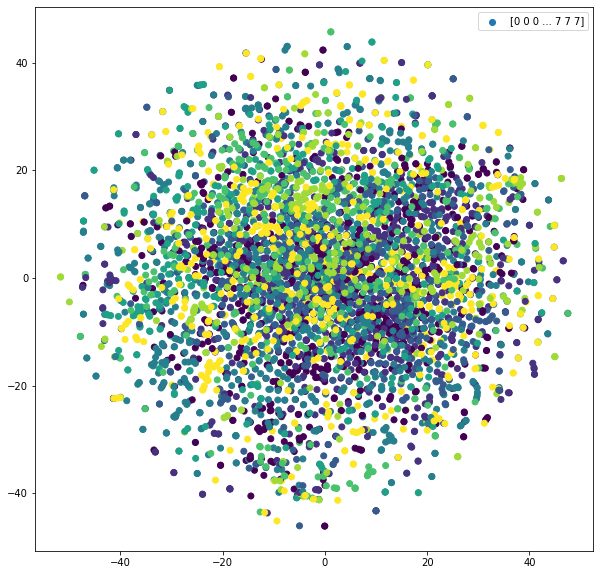

In [38]:
plt.scatter(embedding_new[:, 0], embedding_new[:, 1], c=y_train, cmap='viridis', label=y_train)
plt.legend()
plt.show()

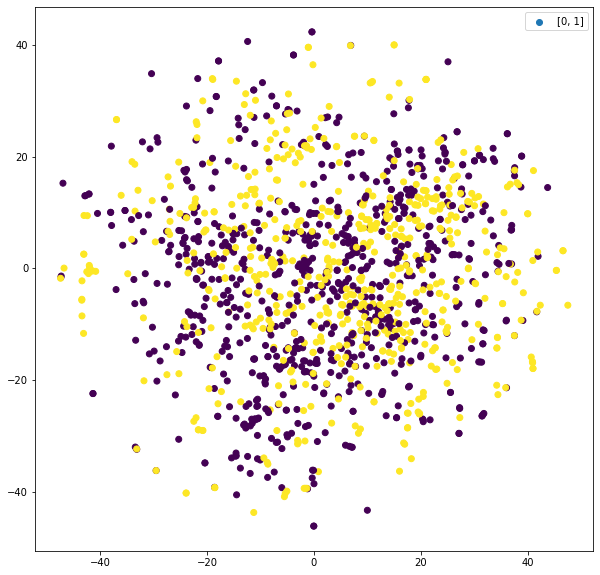

In [99]:
idxs = np.where((y_train == 0) | (y_train == 1))[0]

plt.scatter(embedding_new[idxs, 0], embedding_new[idxs, 1], c=y_train[idxs], cmap='viridis', label=[0, 1])
plt.legend()
plt.show()

**Построение моделей определения значений векторов личности.**

**Поиск гиперпараметров модели depth и iterations.**

In [40]:
'''classifier = CatBoostClassifier(loss_function="MultiClass", eval_metric="AUC", custom_metric="F1",
                           random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

gs = GridSearchCV(estimator=classifier,
                  param_grid=[{"iterations": [300, 500, 700, 1000, 1500, 2000, 4000, 5000],
                               "depth": [3, 4, 5]}],
                  scoring="accuracy",
                  verbose=4,
                  cv=5)
gs.fit(embedding_train, y_train)

print(gs.best_score_, gs.best_params_)'''

'classifier = CatBoostClassifier(loss_function="MultiClass", eval_metric="AUC", custom_metric="F1",\n                           random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices=\'0\')\n\ngs = GridSearchCV(estimator=classifier,\n                  param_grid=[{"iterations": [300, 500, 700, 1000, 1500, 2000, 4000, 5000],\n                               "depth": [3, 4, 5]}],\n                  scoring="accuracy",\n                  verbose=4,\n                  cv=5)\ngs.fit(embedding_train, y_train)\n\nprint(gs.best_score_, gs.best_params_)'

**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов TF-IDF.**

In [41]:
classifier_tfidf = CatBoostClassifier(loss_function="MultiClass", iterations=1000, depth=4, 
                                eval_metric="AUC", custom_metric="F1", 
                                random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

classifier_tfidf.fit(embedding_train_tfidf, y_train_simple)

classifier_tfidf.best_score_

{'learn': {'F1:class=0': 0.576530612244898,
  'F1:class=1': 0.6228571428571428,
  'F1:class=2': 0.5949895615866387,
  'F1:class=3': 0.5571971295905446,
  'F1:class=4': 0.4782608695652174,
  'F1:class=5': 0.5526315789473685,
  'F1:class=6': 0.5611015490533563,
  'F1:class=7': 0.6259067357512954,
  'MultiClass': 1.3241063791470975}}

**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов WordToVec (модель обучена на описании векторов личности).**

In [42]:
classifier_simple = CatBoostClassifier(loss_function="MultiClass", iterations=4000, depth=4, 
                                eval_metric="AUC", custom_metric="F1", 
                                random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

classifier_simple.fit(embedding_train_simple, y_train_simple)

classifier_simple.best_score_

{'learn': {'F1:class=0': 0.8613804905875642,
  'F1:class=1': 0.8998330550918198,
  'F1:class=2': 0.8766876687668768,
  'F1:class=3': 0.9127358490566038,
  'F1:class=4': 0.8733997155049786,
  'F1:class=5': 0.8970588235294118,
  'F1:class=6': 0.8983516483516484,
  'F1:class=7': 0.8888888888888888,
  'MultiClass': 0.9800837027095117}}

**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов WordToVec (предобученная модель с сайта “rusvectores.org”).**

In [43]:
classifier = CatBoostClassifier(loss_function="MultiClass", iterations=4000, depth=5, 
                                eval_metric="AUC", custom_metric="F1", 
                                random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

classifier.fit(embedding_train, y_train)

classifier.best_score_

{'learn': {'F1:class=0': 1.0,
  'F1:class=1': 1.0,
  'F1:class=2': 1.0,
  'F1:class=3': 1.0,
  'F1:class=4': 1.0,
  'F1:class=5': 1.0,
  'F1:class=6': 1.0,
  'F1:class=7': 1.0,
  'MultiClass': 0.14536177888578808}}

**Построение моделей определения позитивности векторов личности.**

**Модель регрессии CatBoostRegressor, обученная на значениях векторов слов WordToVec (предобученная модель с сайта “rusvectores.org”).**

**Поиск гиперпараметров модели depth и iterations.**

In [44]:
'''
regressors = []
for vectorId in range(len(person_vectors)):
    idxs1 = np.where(y_train_pos == vectorId)[0]
    idxs2 = np.where(y_train_neg == vectorId)[0]
    
    embedding_train_ = np.concatenate( (embedding_train_pos[idxs1] , embedding_train_neg[idxs2]), axis=0)
    y_train_ = np.concatenate( (np.full(len(idxs1), 1.0), np.full(len(idxs2), 0.)) )

    regressor = CatBoostRegressor(loss_function="RMSE", eval_metric="RMSE", custom_metric="MAE", 
                                    random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

    gs = GridSearchCV(estimator=regressor,
                      param_grid=[{"iterations": [500, 1000, 1500, 2000, 2500, 3000],
                               "depth": [3, 4, 5]}],
                      scoring="neg_root_mean_squared_error",
                      verbose=4,
                      cv=5)
    gs.fit(embedding_train, y_train)

    print(vectorId, gs.best_score_, gs.best_params_)
'''

'\nregressors = []\nfor vectorId in range(len(person_vectors)):\n    idxs1 = np.where(y_train_pos == vectorId)[0]\n    idxs2 = np.where(y_train_neg == vectorId)[0]\n    \n    embedding_train_ = np.concatenate( (embedding_train_pos[idxs1] , embedding_train_neg[idxs2]), axis=0)\n    y_train_ = np.concatenate( (np.full(len(idxs1), 1.0), np.full(len(idxs2), 0.)) )\n\n    regressor = CatBoostRegressor(loss_function="RMSE", eval_metric="RMSE", custom_metric="MAE", \n                                    random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices=\'0\')\n\n    gs = GridSearchCV(estimator=regressor,\n                      param_grid=[{"iterations": [500, 1000, 1500, 2000, 2500, 3000],\n                               "depth": [3, 4, 5]}],\n                      scoring="neg_root_mean_squared_error",\n                      verbose=4,\n                      cv=5)\n    gs.fit(embedding_train, y_train)\n\n    print(vectorId, gs.best_score_, gs.best_params

In [45]:
regressors = []
for vectorId in range(len(person_vectors)):
    idxs1 = np.where(y_train_pos == vectorId)[0]
    idxs2 = np.where(y_train_neg == vectorId)[0]
    
    embedding_train_ = np.concatenate( (embedding_train_pos[idxs1] , embedding_train_neg[idxs2]), axis=0)
    y_train_ = np.concatenate( (np.full(len(idxs1), 1.0), np.full(len(idxs2), 0.)) )

    regressor = CatBoostRegressor(loss_function="RMSE", iterations=2000, depth=5, 
                                    eval_metric="R2", custom_metric="MAE", 
                                    random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

    regressor.fit(embedding_train_, y_train_)
    
    regressors.append(regressor)

    print(vectorId, regressor.best_score_)

0 {'learn': {'MAE': 0.007225091788133233, 'R2': 0.9773925706082487, 'RMSE': 0.036159791417882864}}
1 {'learn': {'MAE': 0.004392263477827712, 'R2': 0.9996638552929737, 'RMSE': 0.006339664402754468}}
2 {'learn': {'MAE': 0.0013855749769371944, 'R2': 0.9999259644828086, 'RMSE': 0.0019277319630635816}}
3 {'learn': {'MAE': 0.00529151264837859, 'R2': 0.9993092863921189, 'RMSE': 0.007704362586173083}}
4 {'learn': {'MAE': 0.0007684157078140667, 'R2': 0.999985675008745, 'RMSE': 0.0010664585783143187}}
5 {'learn': {'MAE': 0.0016347531355633072, 'R2': 0.9999302949436579, 'RMSE': 0.0023026885326683606}}
6 {'learn': {'MAE': 0.0009646067262113968, 'R2': 0.9999810001187719, 'RMSE': 0.0013076655958357572}}
7 {'learn': {'MAE': 0.0023045549371649965, 'R2': 0.9998569002797559, 'RMSE': 0.0032335370528572766}}


**Выбор лучшей модели классификации для определения значений векторов личности.**

**Загрузка и предобработка тестовых данных.**

In [46]:
df_text = pd.DataFrame([], columns=["description"])

with open("drive/MyDrive/test/Дарвин.txt", encoding="utf8") as rf:
    for sentence in split_text(rf.read().strip()):
        if len(sentence) <= 2: continue
        df_text = df_text.append({"description": sentence}, ignore_index=True)

In [47]:
# Токенизация
df_text["description"] = df_text["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

# Удаление стоп-слов
df_text["description"] = df_text["description"].apply(
    lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

# Лемматизация
df_text["description"] = df_text["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

In [48]:
df_text.head(10)

,description
0,"[спасибо, скачать, книга, бесплатный, электрон..."
1,"[ru, всё, книга, автор, этот, книга, другой, ф..."
2,"[чарлзти, дарвин, воспоминание, о, развитие, м..."
3,"[я, приходиться, слышать, отец, мнение, челове..."
4,"[не, обстоять, дело, я, ибо, самый, ранний, мо..."
5,"[мой, мать, умереть, июль, г, немногое, восемь..."
6,"[думать, это, забвение, мой, воспоминание, воз..."
7,"[весною, год, отдать, школа, приходящий, учени..."
8,"[до, начать, ходить, школа, я, заниматься, сес..."
9,"[я, рассказывать, проявлять, учение, гораздо, ..."


**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов TF-IDF.**

In [49]:
# Обучаем TF-IDF
df_text_ = df_text.copy()
df_text_["description"] = df_text_["description"].apply(lambda tokens: ' '.join(tokens))

embedding_test_tfidf = vectorizer.fit_transform(df_text_["description"].values)

predict_proba = classifier_tfidf.predict_proba(embedding_test_tfidf)

for idx, vector in enumerate(np.mean(predict_proba, axis=0)):
    print("{:.3f}".format(vector), "-", person_vectors[idx])

0.158 - brown
0.130 - black
0.108 - red
0.225 - orange
0.079 - yellow
0.092 - green
0.091 - blue
0.116 - purple


**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов WordToVec (модель обучена на описании векторов личности).**

In [50]:
embedding_test_simple = tfidfEmbVect_simple.transform(df_text["description"].values)

predict_proba = classifier_simple.predict_proba(embedding_test_simple)

for idx, vector in enumerate(np.mean(predict_proba, axis=0)):
    print("{:.3f}".format(vector), "-", person_vectors[idx])

0.182 - brown
0.131 - black
0.125 - red
0.178 - orange
0.087 - yellow
0.092 - green
0.076 - blue
0.128 - purple


**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов WordToVec (предобученная модель с сайта “rusvectores.org”).**

In [51]:
embedding_test = tfidfEmbVect.transform(df_text["description"].values)

predict_proba = classifier.predict_proba(embedding_test)

arr_vectors_man = []
for idx, vector in enumerate(np.mean(predict_proba, axis=0)):
    arr_vectors_man.append(vector)
    factor_positive = np.mean(regressors[idx].predict(embedding_test))
    print("{:.3f}".format(vector), "-", person_vectors[idx], "{:.3f}".format(factor_positive))

for idx in range(len(person_vectors)):
    factor_positive = np.mean(regressors[idx].predict(embedding_test))
    arr_vectors_man.append(factor_positive)

0.274 - brown 0.935
0.116 - black 0.880
0.155 - red 0.954
0.147 - orange 0.902
0.053 - yellow 0.919
0.092 - green 0.895
0.056 - blue 0.914
0.107 - purple 0.936


**Проверка моделей на текстовых данных разных тем.**

In [52]:
def getPageLinks(keyword, page_number):  
    # Запрашиваем данные
    response = requests.get('https://www.labirint.ru/search/' + keyword + '/',
                            params={'page': page_number},
                            headers={'User-Agent': UserAgent().chrome})
    
    if not response.ok: return [ (keyword, '') ] 
    
    # Получаем содержимое страницы и переводим в суп
    soup = BeautifulSoup(response.content,'html.parser')
    
    # Находим ссылки
    list_div = soup.findAll('div', attrs={'class': 'product need-watch '})

    links = [ (keyword, 'https://www.labirint.ru' + div.find('a', attrs={'class': 'cover'}).attrs['href']) for div in list_div]
    
    return links

In [53]:
def getDescription(link):  
    # Запрашиваем данные
    response = requests.get(link, headers={'User-Agent': UserAgent().chrome})
    
    if not response.ok: return '' 
    
    # Получаем содержимое страницы
    soup = BeautifulSoup(response.content,'html.parser')

    # Описание книги (фильма)
    annotation = soup.find('div', attrs={'id': 'fullannotation'})

    if annotation == None: return ''

    return ' '.join([s for s in annotation.p.stripped_strings])

**Скачиваем с сайта “labirint.ru” описания книг по 3-м темам.**

In [54]:
kwords = ['кулинар', 'художник', 'бизнес'] #['ужас', 'любовь']
# Находим ссылки всех страниц
links = []
for kword in kwords:
  for page_num in range(1, 18, 1):
    links_ = getPageLinks(kword, page_num)
    if len(links_) == 0: break
    sleep(0.01)
    links += links_

links = list(set(links))   # Удаляем повторяющиеся, если есть

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


In [55]:
links[: 10]

[('художник', 'https://www.labirint.ru/books/841770/'),
 ('художник', 'https://www.labirint.ru/books/524478/'),
 ('художник', 'https://www.labirint.ru/books/260748/'),
 ('кулинар', 'https://www.labirint.ru/books/564782/'),
 ('художник', 'https://www.labirint.ru/books/620691/'),
 ('художник', 'https://www.labirint.ru/books/624763/'),
 ('кулинар', 'https://www.labirint.ru/books/739752/'),
 ('бизнес', 'https://www.labirint.ru/books/385420/'),
 ('художник', 'https://www.labirint.ru/books/602240/'),
 ('кулинар', 'https://www.labirint.ru/books/825009/')]

In [56]:
lock = threading.Lock()

In [57]:
def build_data(links, texts, labels, idx_start, idx_end):
    for link in links[idx_start : idx_end]:
        if link[1] == '': continue
        descr = getDescription(link[1])

        lock.acquire()

        labels.append(link[0])      
        texts.append(descr)

        lock.release()

        sleep(0.01)

In [58]:
texts = []; labels = []

count = len(links) // 10             # Разбиваем чтение данных на 10 + 1 потоков

cur_count = 0
for idx in range(count, len(links), count):
    cur_count = idx
    th = Thread(target=build_data, args=(links, texts, labels, idx - count, idx))
    th.start()

if cur_count != len(links):
    th = Thread(target=build_data, args=(links, texts, labels, cur_count, len(links)))
    th.start()

print('Всего ссылок: ', len(links))

while len(texts) != len(links):
  sleep(30)
  print('Прочитано ссылок: ', len(texts))

Всего ссылок:  2935
Прочитано ссылок:  77
Прочитано ссылок:  176
Прочитано ссылок:  258
Прочитано ссылок:  348
Прочитано ссылок:  447
Прочитано ссылок:  541
Прочитано ссылок:  632
Прочитано ссылок:  716
Прочитано ссылок:  806
Прочитано ссылок:  892
Прочитано ссылок:  981
Прочитано ссылок:  1069
Прочитано ссылок:  1152
Прочитано ссылок:  1237
Прочитано ссылок:  1325
Прочитано ссылок:  1418
Прочитано ссылок:  1510
Прочитано ссылок:  1528
Прочитано ссылок:  1605
Прочитано ссылок:  1692
Прочитано ссылок:  1785
Прочитано ссылок:  1884
Прочитано ссылок:  1965
Прочитано ссылок:  2048
Прочитано ссылок:  2139
Прочитано ссылок:  2230
Прочитано ссылок:  2314
Прочитано ссылок:  2407
Прочитано ссылок:  2497
Прочитано ссылок:  2586
Прочитано ссылок:  2671
Прочитано ссылок:  2759
Прочитано ссылок:  2850
Прочитано ссылок:  2928
Прочитано ссылок:  2935


In [59]:
# Удаляем данные без описания
print('Кол-во ссылок: ', len(texts))

texts_ = texts[:]
labels_ = labels[:]

texts = []; labels = []

for idx, text in enumerate(texts_):
   if text == '': continue
   texts.append(text)
   labels.append(labels_[idx])
   
texts = np.array(texts)

print('Кол-во ссылок с данными: ', len(texts))

Кол-во ссылок:  2935
Кол-во ссылок с данными:  818


In [60]:
# Преобразуем тестовые метки в числовые
labels = np.array(labels)
for kword in kwords:
    labels[labels == kword] = kwords.index(kword)
labels = labels.astype(np.int8)

np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int8), array([231, 244, 343]))

In [61]:
texts[:5]

array(['Поведение человека покупающего - неизведанная территория для маркетологов и продаванов. В 2002 году Даниэль Канеман получил Нобелевскую премию, доказав, что большинство людей принимают иррациональные решения. Действительно, эволюция человеческого мозга насчитывает миллионы лет, в ходе которых нам чаще приходилось убегать от леопардов, чем следить за индексом Доу-Джонса. Современные компании сочиняют рекламные тексты и формируют ценность продукта, зачастую не зная, что именно заставляет людей покупать. Эта книга - ключ к пониманию скрытых механизмов принятия решения современными покупателями. Николай Молчанов - кандидат психологических наук, MBA в бизнес-школе INSEAD, один из лучших экспертов в области управления поведением покупателей. Автор одного из самых популярных Telegram-каналов Рунета "Психология маркетинга", который читают более 60 000 человек. В своей книге он объясняет, по каким законам работает человеческий мозг и как психология поможет повысить эффективность компани

In [62]:
labels[:5]

array([2, 0, 1, 2, 2], dtype=int8)

**Переводим текстовые описания книг в вектора личности, используя построенные модели многоклассовой классификации и регрессии на основе значений векторов, вычисленных предобученной моделью WordToVec.**

In [75]:
arr_vectors = []

for text in texts:
    df_texts = pd.DataFrame([], columns=["description"])

    for sentence in split_text(text.strip()):
        if len(sentence) <= 2: continue
        df_texts = df_texts.append({"description": sentence}, ignore_index=True)

    # Токенизация
    df_texts["description"] = df_texts["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

    # Удаление стоп-слов
    df_texts["description"] = df_texts["description"].apply(
        lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

    # Лемматизация
    df_texts["description"] = df_texts["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

    embedding_test = tfidfEmbVect.transform(df_texts["description"].values)  # Векторное представление слов

    predict_proba = classifier.predict_proba(embedding_test)

    vectors = []
    for vector in np.mean(predict_proba, axis=0):
        vectors.append(vector)  # Вектор личности

    for idx in range(len(person_vectors)):
        factor_positive = np.mean(regressors[idx].predict(embedding_test))
        vectors.append(factor_positive)     # Позитивность вектора

    arr_vectors.append(vectors)

arr_vectors = np.array(arr_vectors)

**Графики отображения векторов личности и позитивности векторов в двумерное пространство.**

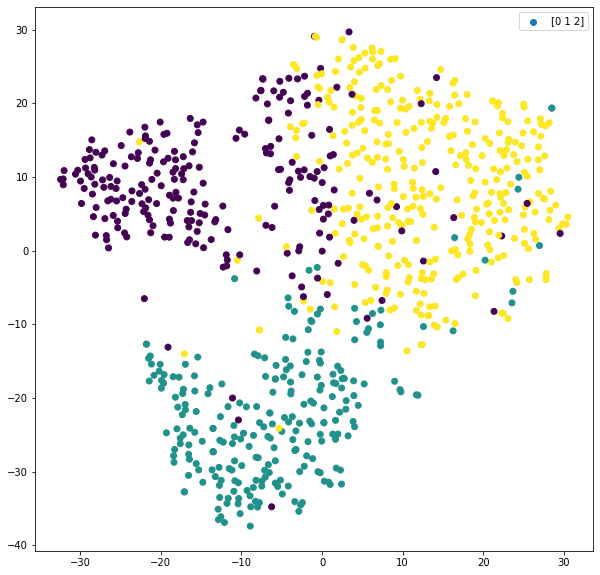

In [90]:
#pca = PCA(n_components=2)
#embedding = pca.fit_transform(arr_vectors)

##reducer = umap.UMAP(n_components=2, random_state=42)
#embedding = reducer.fit_transform(arr_vectors)

tsne = TSNE(n_components=2, learning_rate='auto', init='random')
embedding = tsne.fit_transform(arr_vectors)

plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', label=np.unique(labels))
plt.legend()
plt.show()

In [89]:
plt.rcParams["figure.figsize"] = [10, 5]

In [78]:
dbs = DBSCAN(eps=0.15, min_samples=2, metric="euclidean")

y_pred = dbs.fit_predict(arr_vectors)

In [79]:
np.unique(y_pred, return_counts=True)

(array([-1,  0,  1,  2,  3]), array([ 11, 799,   2,   3,   3]))

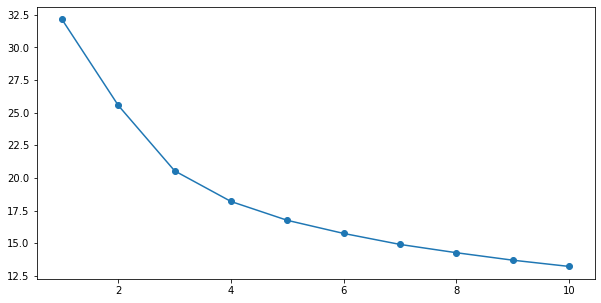

In [80]:
distortions = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init=20, max_iter=300, random_state=0)

  kmeans.fit(arr_vectors)

  distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.show()

In [81]:
n_clusters = 3

In [82]:
#km = KMeans(n_clusters=n_clusters, n_init=20, max_iter=300, random_state=0)
#y_pred = km.fit_predict(arr_vectors)

ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, n_init=20, max_iter=300, random_state=0, metric="euclidean")
y_pred = ts_kmeans.fit_predict(arr_vectors)


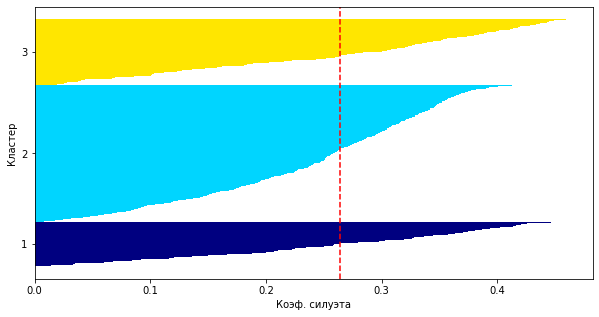

In [83]:
silhouette_plot(arr_vectors, y_pred)

In [84]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2]), array([147, 454, 217]))

**Графики векторов и текстовые описания книг в каждом кластере (600 символов описания книги).**

Кластер 1


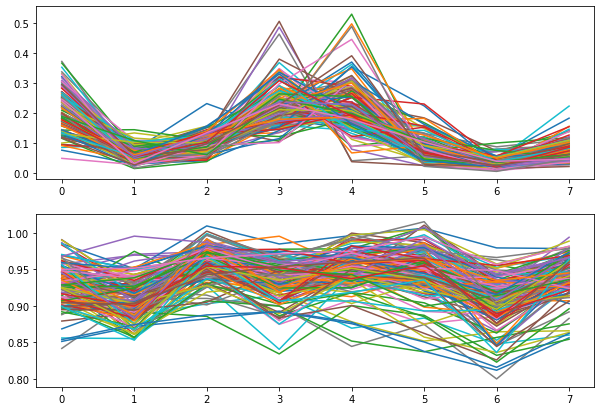

График векторов личности (вверху), график позитивности векторов (внизу)
Истинные метки:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Предсказанные метки:
 [0 1 1 1 0 0 0 0 2 0 0 0 0 1 1 2 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 2 1 0 0 0 1 1 0 1 2 1 0 1 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 2 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 2 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 2 1 0 1 0 1 0

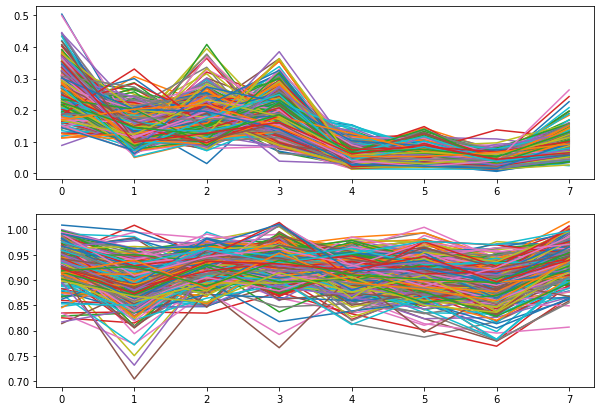

График векторов личности (вверху), график позитивности векторов (внизу)
Истинные метки:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
Предсказанные метки:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

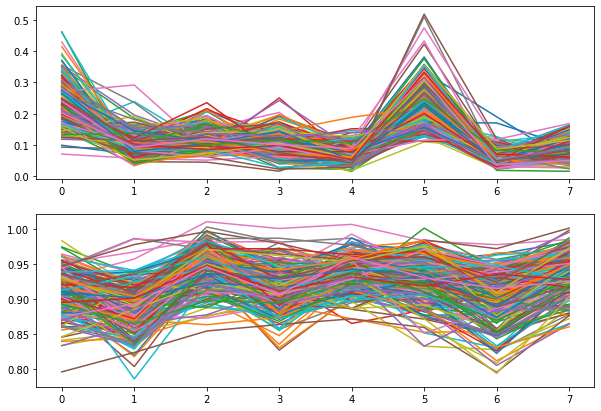

График векторов личности (вверху), график позитивности векторов (внизу)
Истинные метки:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Предсказанные метки:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 1 2 1
 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 1 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 1 1 1

In [91]:
indexes = [0, 2, 1] # Индексы соответствия идентиф. вектора в кластере и идентиф. вектора в исходных данных

labels_ = labels.copy()
for cluster_id in range(n_clusters):
    print('Кластер ' + str(cluster_id + 1))
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    for vectors in arr_vectors[ np.where(y_pred == cluster_id)[0] ]:
        ax1.plot(vectors[:8])
        ax2.plot(vectors[8:])        
    plt.show()
    print('График векторов личности (вверху), график позитивности векторов (внизу)')

    idxs = np.where(labels == indexes[cluster_id])[0]

    y_true_cluster = labels[idxs]                # Истинные метки
    y_true_cluster[:] = cluster_id
    print('Истинные метки:\n', y_true_cluster)
    y_pred_cluster = y_pred[idxs]                # Предсказанные метки
    print('Предсказанные метки:\n', y_pred_cluster)
    labels_[idxs] = cluster_id                      

    accuracy = accuracy_score(y_true_cluster, y_pred_cluster)
    print('accuracy -', accuracy, '\n')

    df_data = pd.DataFrame(texts[idxs], columns=['text'])
    for data in df_data.values[: 7]:
        print(data[0][:200])
        print(data[0][200:400])
        print(data[0][400:600], '\n')

print('Accuracy:', accuracy_score(y_pred, labels_))

In [92]:
for idx, vectors in enumerate(arr_vectors):
    if vectors[9] < 0.7: print(idx)

In [87]:
texts[52]

'Расширенный и обновленный англо-русский словарь по нефтегазовому бизнесу. Содержит наиболее сложные для перевода нетехнические термины и устойчивые словосочетания, широко используемые в самых различных сферах международного нефтяного бизнеса: от нефтяного права до нефтетрейдинга, от оценки инвестиционных проектов до торговли нефтяными фьючерсами и производными финансовыми инструментами, от нефтяной логистики до ценообразования на нефть и нефтепродукты. В нем представлены оптимальные русскоязычные эквиваленты более 6000 англо-американских терминов и аббревиатур и дано краткое толкование тех из них, которые не являются самоочевидными. Словарь удобен в пользовании и будет несомненно полезным как для новичков в международном нефтегазовом бизнесе, так и для специалистов, хорошо знакомых с его особенностями, но испытывающих затруднения с англо-американской или русскоязычной терминологией, для преподавателей и студентов высших учебных заведений международного, экономического и нефтяного проф

In [88]:
np.argmax(cosine_similarity(np.array(arr_vectors_man)[np.newaxis, :], arr_vectors))

349

Кратко из книги В.К. Толкачева:

Зеленый вектор:
Настоящая реальность — это мир яркого света. Отсюда театральность, яркость, демонстративность в поведении визуального типа, некоторый драматизм и острота всех его переживаний, ибо это «первичные» переживания, связанные с пересечением некоторой новой границы в восприятии. В дальнейшем для этого визуального типа становятся бессознательно желанными просто вспышки света, новое, неожиданное сочетание красок, цветов, оттенков, того, что видится, чем можно наслаждаться вновь и вновь, что придает жизни яркость ощущений.

Красный вектор:
Вечный «искатель приключений и завоеватель». Он раб идеи. Его путь к признанию проложен через осуществление чего-нибудь совершенно грандиозного и уникального, например, через восхождение на самую высокую гору или пересечение океана на плоту без весел и со связанными руками. Такое свершение, по его мнению, затмит всех претендентов на первое место. Он уверен, что всегда добьется аплодисментов, если дольше всех продержится на верхушке флагштока, или станет первым европейцем, который ступил на какую нибудь землю, или пройдет над водопадом по натянутой веревке. Все эти деяния выглядят очень заманчиво, но, конечно, до тех пор, пока они не достигнуты, и искатель приключений вдруг обнаруживает, что покорение очередной вершины ему ничего не дало. Тогда он изобретает себе новый достойный подвиг, который станет пропуском в вечность.

Оранжевый вектор: Самодисциплина для него не в тягость, в комнате на стене висит режим дня. Дисциплина становится для него психически прирожденным фактором; самоистязание себя дисциплиной — это тоже один из способов существования в этой жизни. План, режим — залог успеха! Моего и, следовательно, Вашего. Ослушаться его невозможно! Зачастую им характерен подвиг великомучеников, подвиг самоотречения. Латентный мазохизм делает их сверхисполнительными, готовыми «разбить лоб» ради исполнения долга. Для них актуально понятие «нести свой крест».

Синий вектор:
Он слышит ритмику слова. Речь, ритмически законченная, становится необходимой формой существования. Он — звуковик, поэт, организм которого не может нормально функционировать без поэзии. Он пишет стихи не для нас, а для себя. Вдохновение приходит не всегда, но его можно достичь искусственно, например, съев мухомор. Надо привести себя в необычное биохимическое состояние, и тогда стихи появятся сами собой.
Они истинные меломаны. Только они способны оценить музыку и мир звуков во всей его полноте и многообразии. Музыка доставляет им глубокое наслаждение.

Желтый вектор:
Они — прекрасные кулинары.
Он — ест много, но разнообразно; он все пробует на вкус.
Что может быть приятнее ощущений, исходящих из переполненного вкуснятиной желудка и чувства приятной дремы, охватывающей организм? Не в этом ли смысл жизни? Качество жизни наиболее точно измеряется количеством выпитого пива!